In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
tip = sns.load_dataset('tips')

In [97]:
tip.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


**Why to do EDA?**

Data analysis
* To get the insights from the data.
* To fit the model in a best and more generalized way

Data Preprocessing
* Missing values
* Duplicates
* Outliers
* Feature Engineering
    * Feature encoding
    * Scalling
    * Transformation
    * create new features

In [98]:
# Data Analysis

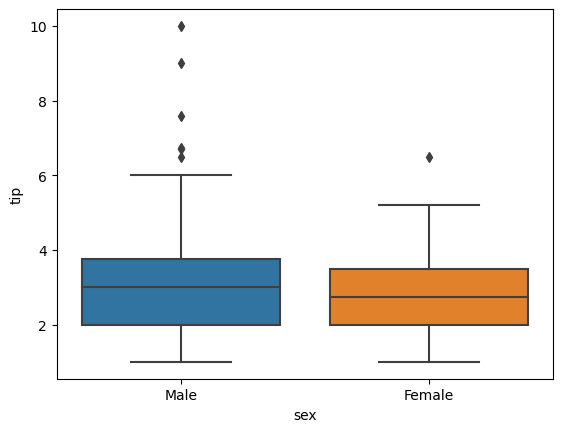

In [99]:
# How sex is related to tips?
# Bivariate analysis
sns.boxplot(data=tip,x='sex',y='tip')
plt.show()

<Axes: xlabel='sex', ylabel='tip'>

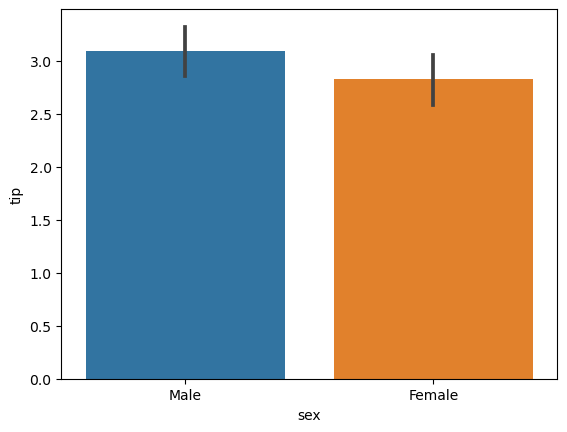

In [100]:
sns.barplot(data=tip,x='sex',y='tip')

Inference:
* Males are paying more tips tha females. (This is only valid for this sample. it may or may not be true for population)

In [101]:
from scipy import stats

In [102]:
# Need to check how significant is the sample
# mu1 = Avg tip payed by males
# mu2 = Avg tip payed by females

# Ho: mu1 <= mu2
# Ha: mu1 > mu2

# Two sample t-test

# Assumption 1: data must be normal
# Since sample is large enough we can assume the data to be normal 

# Assumption 2: variances must be equal
samp1 = tip[tip['sex']=='Male']['tip']
samp2 = tip[tip['sex']=='Female']['tip']

# Ho: Variances are equal
# Ha: variances are not equal
stats.levene(samp1,samp2)
# Fail to reject Ho: variances are equal

# two sample t-test with equal variances
stats.ttest_ind(samp1,samp2,alternative='greater')

Ttest_indResult(statistic=1.387859705421269, pvalue=0.08322811751728378)

In [103]:
tip['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [104]:
tip['tip'].mean()

2.99827868852459

In [105]:
# Estiamte the popultion avg tip with 90% c
x_bar = tip['tip'].mean()
s = tip['tip'].std()
n = len(tip['tip'])

stats.t.interval(confidence=0.9,loc=x_bar,scale=s/np.sqrt(n),df=n-1)

(2.8520226737233187, 3.144534703325861)

In [106]:
data_e = pd.get_dummies(tip,drop_first=True)

In [107]:
x = data_e.drop(columns='tip')
y = data_e['tip']

In [108]:
# OLS Model
import statsmodels.api as sma

In [109]:
model = sma.OLS(y,sma.add_constant(x)).fit()

In [110]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.20e-28
Time:                        16:19:11   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5908      0.256      2.310      0.022       0.087       1.095
total_bill      0.0945      0.010      9.841      0.000       0.076       0.113
size            0.1760      0.090      1.966      0.051      -0.000       0.352
sex_Female      0.0324      0.142      0.229      0.819      -0.247       0.311
smoker_No       0.0864      0.147      0.589      0.556      -0.202       0.375
day_Fri         0.1623      0.393      0.412      0.680      -0.613       0.937
day_Sat         0.0408      0.471      0.087      0.931      -0.886       0.968
day_Sun         0.1368      0.472      0.290      0.772      -0.793       1.066
time_Dinner    -0.0681      0.445     -0.153      0.878      -0.944       0.808
==============================================================================
Omnibus:                       27.860   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.555
Skew:                           0.607   Prob(JB):                     3.87e-12
Kurtosis:                       4.923   Cond. No.                         281.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Data Preprocessing

In [111]:
# Check for missing values

In [112]:
tip.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

**Treat Missing Values**

* Closest Fit / Logical impution
* Central value Imputaion
* Deletion if very feqw rows or most values in columns are missing

In [113]:
data = sns.load_dataset('titanic')

In [114]:
(data.isnull().sum()/data.shape[0])*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [115]:
# Fill the missing values in Age?
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [116]:
data.groupby(by='who')['age'].median()

who
child     5.0
man      30.0
woman    30.0
Name: age, dtype: float64

In [117]:
data.loc[(data['age'].isnull())&(data['who']=='man'),'age'] = data[data['who']=='man']['age'].mean()

In [118]:
data['age'] = np.where((data['age'].isnull())&(data['who']=='woman'),
        data[data['who']=='woman']['age'].mean(), data['age'])

In [119]:
data['age'] = np.where((data['age'].isnull())&(data['who']=='child'),
        data[data['who']=='child']['age'].mean(), data['age'])

In [120]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [121]:
data['embark_town'].fillna(data['embark_town'].mode()[0],inplace=True)

In [122]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [123]:
data.loc[data['embarked'].isnull(),'embarked'] = data['embarked'].mode()[0]

In [124]:
# Percentile
ul,ll = np.percentile(tip['total_bill'],[99,1])
tip.loc[(tip['total_bill']>ul)|(tip['total_bill']<ll)]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


**Treat the outliers**

* Deletion
* Capping

In [125]:
q1,q3 = np.quantile(tip['tip'],[0.25,0.75])
iqr = q3-q1
ul,ll = q3+1.5*iqr, q1-1.5*iqr
print(ul,ll)

5.90625 -0.34375


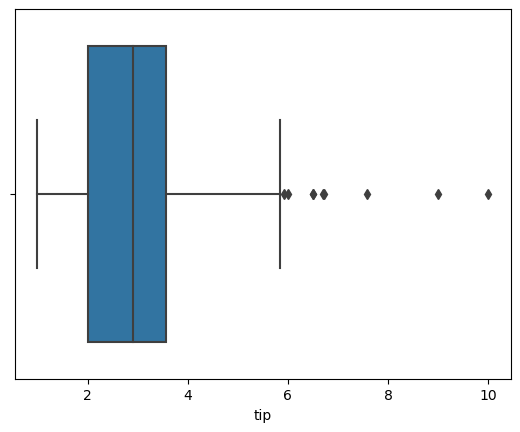

In [126]:
sns.boxplot(data=tip,x='tip')
plt.show()

In [127]:
# Capping
q1,q3 = np.quantile(tip['total_bill'],[0.25,0.75])
iqr = q3-q1
ul,ll = q3+1.5*iqr, q1-1.5*iqr
tip['total_bill'] = tip['total_bill'].apply(lambda x: ul if x>ul else ll if x<ll else x)

In [128]:
tip.shape

(244, 7)